In [1]:
import json
import matplotlib.pyplot as plt

In [7]:
DATA_FILE = '/Users/ratmirgaitov/Library/CloudStorage/GoogleDrive-gaitovrat@gmail.com/My Drive/Bachelor/Recordings/recordng-1712241928-1712242374.json'

data: list[dict]

with open(DATA_FILE) as f:
    data = json.load(f)

print('Loaded rows:', len(data))
print('Get only rows with zero speed.')
data = [d for d in data if d['data']['motor']['leftSpeed'] == 0 or d['data']['motor']['rightSpeed'] == 0]
print('Filtered rows:', len(data))

Loaded rows: 10379
Get only rows with zero speed.
Filtered rows: 6778


In [11]:
import math

print('Calculate accelerations')
accelerations = [d['data']['sensor']['accel'] for d in data]
accelerations = [math.sqrt(a['x'] ** 2 + a['y'] ** 2 + a['z'] ** 2) for a in accelerations]
accelerations[:10]

Calculate accelerations


[8433.545399178212,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058,
 8420.784761529058]

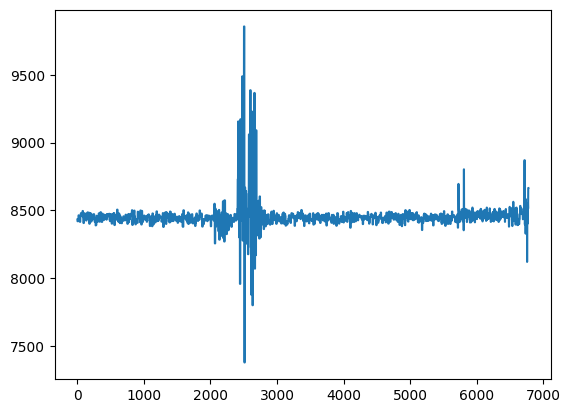

In [18]:
plt.plot(accelerations)